# Python Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Data Preparation


In [3]:
os.chdir('/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets')
if os.path.isdir('train/covid') is False:
    os.makedirs('train/covid')
    os.makedirs('train/normal')
    os.makedirs('valid/covid')
    os.makedirs('valid/normal')

In [4]:
for i in random.sample(glob.glob('/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datset/covid*'), 100):
    shutil.move(i, '/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/train/covid')
for i in random.sample(glob.glob('/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datset/covid*'), 40):
    shutil.move(i, '/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/valid/covid')
for i in random.sample(glob.glob('/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datset/normal*'), 100):
    shutil.move(i, '/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/train/normal')
for i in random.sample(glob.glob('/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datset/normal*'), 40):
    shutil.move(i, '/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/valid/normal')

In [2]:
train_path = '/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/train'
valid_path = '/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/valid'

# Data Preprocessing

In [3]:
train_dataset = image.ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_dataset = image.ImageDataGenerator(
rescale = 1./255)


train_batches = train_dataset.flow_from_directory(directory=train_path, target_size=(224,224), class_mode = 'binary', batch_size=32)

valid_batches = test_dataset.flow_from_directory(directory=valid_path, target_size=(224,224), class_mode = 'binary', batch_size=32)

Found 200 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


# Build CNN Model

In [66]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

# Training

In [68]:
model.fit(x = train_batches, steps_per_epoch = 6, validation_data = valid_batches, validation_steps  = 2 ,epochs = 10, verbose = 2)

Train for 6 steps, validate for 2 steps
Epoch 1/10
6/6 - 63s - loss: 0.9198 - accuracy: 0.5417 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 2/10
6/6 - 63s - loss: 0.6265 - accuracy: 0.6369 - val_loss: 0.6060 - val_accuracy: 0.9219
Epoch 3/10
6/6 - 59s - loss: 0.4370 - accuracy: 0.7976 - val_loss: 0.3595 - val_accuracy: 0.9375
Epoch 4/10
6/6 - 58s - loss: 0.3179 - accuracy: 0.8988 - val_loss: 0.3658 - val_accuracy: 0.9375
Epoch 5/10
6/6 - 59s - loss: 0.2506 - accuracy: 0.9107 - val_loss: 0.1687 - val_accuracy: 0.9375
Epoch 6/10
6/6 - 58s - loss: 0.1630 - accuracy: 0.9405 - val_loss: 0.1402 - val_accuracy: 0.9375
Epoch 7/10
6/6 - 59s - loss: 0.1994 - accuracy: 0.9107 - val_loss: 0.1471 - val_accuracy: 0.9531
Epoch 8/10
6/6 - 59s - loss: 0.1018 - accuracy: 0.9762 - val_loss: 0.1255 - val_accuracy: 0.9219
Epoch 9/10
6/6 - 59s - loss: 0.1107 - accuracy: 0.9583 - val_loss: 0.0902 - val_accuracy: 0.9531
Epoch 10/10
6/6 - 59s - loss: 0.0640 - accuracy: 0.9762 - val_loss: 0.0863 - val_accura

# Save Model

In [79]:
model.save("/home/rish/Downloads/Deep-Learning/Covid 19 Detection/model/model_covid_19.h5")

# Evaluation

In [69]:
print(model.evaluate_generator(train_batches))

print(model.evaluate_generator(valid_batches))

[0.035585377706281306, 0.99]
[0.19331993286808333, 0.9375]


In [70]:
y_actual, y_test = [],[]

In [71]:
train_batches.class_indices

{'covid': 0, 'normal': 1}

In [72]:
for i in os.listdir("/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/valid/normal/"):
    img=image.load_img("/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/valid/normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    
for i in os.listdir("/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/valid/covid/"):
    img=image.load_img("/home/rish/Downloads/Deep-Learning/Covid 19 Detection/Datsets/valid/covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [73]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

# Confusion Matrix

In [76]:
cm = confusion_matrix(y_true=y_actual, y_pred=y_test)

In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[36  4]
 [ 3 37]]


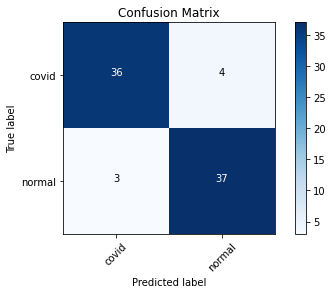

In [78]:
cm_plot_labels = ['covid','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')